# Derivación numérica

In [1]:
#Las siguientes líneas asumen que este archivo se ejecute
#desde la carpeta `clases` del curso
using Pkg
Pkg.activate("../")

  Activating project at `~/Escritorio/TSFCII`


## Motivación: el método de Newton

Un problema usual es el de encontrar los ceros de una función. Una situación
concreta donde esto ocurre es cuando buscamos los máximos o mínimos de una
función $f(x)$. Aplicaciones de esto se encuentran en redes neuronales, en
las que uno *entrena* la red buscando el mínimo de una función de costo.

Un método común para obtener los ceros de una función es el
[método de Newton](https://en.wikipedia.org/wiki/Newton%27s_method),
que requiere evaluar sucesivamente tanto la función $f(x)$ como su derivada
$f^\prime(x)$. Si bien uno puede escribir la función $f^\prime(x)$ en el
programa, uno quisiera tener formas de evaluar la derivada a partir de la
propia función $f(x)$, esto puede ser complicado y da la posibilidad de cometer
errores. Esto ocurre a menudo en redes neuronales  uno quiere
introducir nuevas funciones para el entrenamiento de la red.

En este apartado estudiaremos algunos algoritmos para obtener *aproximaciones*
de las derivadas de una función $f(x)$ numéricamente.

## Derivadas numéricas

### Derivada *derecha*

Como bien sabemos del curso de cálculo, la derivada se define como:

$$
f^\prime(x_0) = \frac{{\rm d}f}{{\rm d}x}(x_0) \equiv \lim_{h\to 0}
\frac{f(x_0+h)-f(x_0)}{h}.
$$

Numéricamente, es difícil implementar el concepto *límite*. Olvidándolo por el momento,
el lado derecho de la definición es relativamente sencillo de implementar
numéricamente. Esencialmente requerimos evaluar $f(x)$ en $x_0$ y en $x_0+h$,
donde $h$ es un número (de punto flotante) pequeño. La sutileza está entonces
en implementar por el límite $h\to 0$. Esto, por su parte, lo haremos numéricamente
considerando valores de $h$ cada vez más pequeños, por lo que esperamos obtener valores
cada vez más precisos de la derivada.

Para ilustrar lo anterior, empezaremos definiendo la función `derivada_derecha`,
que aproximará *numéricamente* la derivada de la función $f(x)$, de una variable
(a priori arbitaria), en un punto $x_0$. Para esto, utilizaremos la aproximación de
la derivada que se basa en la definición, y eventualmente simularemos el *límite*
como se describió antes.
Esta función entonces dependerá de `f`, la función que queremos derivar, `x0` el punto
donde queremos derivar a la función, y `h`, que es el incremento *finito* respecto a $x_0$
que aparece en la definición arriba. Es decir, calcularemos la derivada usando la
aproximación
$$
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} \equiv \frac{f(x_0+h)-f(x_0)}{h},
$$
Este método se conoce por el nombre de *diferencias finitas*.

In [2]:
"""
    derivada_derecha(f, x0,h)

Evalúa la derivada de `f` en `x0` usando diferencias finitas con el
incremento por la derecha.
"""
derivada_derecha(f, x0, h) = (f(x0 + h) - f(x0)) / h

Main.var"##292".derivada_derecha

A fin de *simular* el $\lim_{h\to 0}$, consideraremos distintos valores de $h$
cada vez más próximos a cero. Para cada valor de $h$ calcularemos el error
absoluto del cálculo numérico, es decir, la diferencia del valor calculado
respecto al valor *exacto* de la derivada, usando $f(x) = 3x^3-2$ en $x_0=1$.

In [3]:
f(x) = 3x^3-2

f′(x) = 9x^2

f′ (generic function with 1 method)

In [4]:
errorabs_dd(f, f′, x0, h) = abs(f′(x0) - derivada_derecha(f, x0, h))

errorabs_dd (generic function with 1 method)

In [5]:
f′(1.0)

9.0

In [6]:
derivada_derecha(f, 1.0, 0.1)

9.930000000000012

In [7]:
errorabs_dd(f, f′, 1.0, 0.1)

0.9300000000000122

In [8]:
errs_dd = [ errorabs_dd(f, f′, 1.0, 1/10^i) for i=1:15 ]

15-element Vector{Float64}:
 0.9300000000000122
 0.0902999999999956
 0.00900299999829457
 0.0009000299939856404
 9.000033286099551e-5
 8.999393571684777e-6
 9.045354545378359e-7
 3.4120603231713176e-8
 7.446633389918134e-7
 7.446633389918134e-7
 7.446633389918134e-7
 0.0008001052410691045
 0.007193500536232023
 0.029397961028735153
 0.7699626167013776

In [9]:
findmin(errs_dd)

(3.4120603231713176e-8, 8)

In [10]:
derivada_derecha(f, 1.0, 1.0e-8)

9.000000034120603

El resultado anterior muestra que el mínimo del error absoluto lo encontramos
usando `h=1.0e-8` (con el muestreo que usamos), y el error absoluto es del orden de
`3.4e-8`. Esto indica que, en algún sentido, la noción de límite no la logramos
*simular* correctamente.

### Derivada *simétrica*

Una definición alternativa a la dada anteriormente para la derivada, consiste en *simetrizar*
la ocurrencia de $h$ en la definición. Podemos entonces definir a la derivada
usando la definición
$$
f^\prime(x_0) \equiv \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
$$
Repetiremos el ejercicio anterior, usando ahora la aproximación de la derivada simétrica
$$
f'(x_0) \approx \frac{\Delta f_\textrm{sym}}{\Delta x} \equiv \frac{f(x_0+h)-f(x_0-h)}{2h}.
$$

In [11]:
"""
    derivada_simétrica(f, x0,h)

Evalúa la derivada de `f` en `x0` usando diferencias finitas con el
incremento simétrico.
"""
derivada_simétrica(f, x0, h) = (f(x0 + h) - f(x0 - h)) / (2h)

Main.var"##292".derivada_simétrica

In [12]:
errorabs_ds(f, f′, x0, h) = abs(f′(x0) - derivada_simétrica(f, x0, h))

errorabs_ds (generic function with 1 method)

In [13]:
errs_ds = [errorabs_ds(f, f′, 1.0, 1/10^i) for i=1:15]

15-element Vector{Float64}:
 0.03000000000000469
 0.0003000000000046299
 2.9999992570139966e-6
 2.9995014472206094e-8
 3.0320990163090755e-10
 7.426592674164567e-11
 8.139124929584796e-10
 1.0288317753293086e-8
 3.0057412914175075e-7
 7.446633389918134e-7
 7.446633389918134e-7
 0.0003560160312190419
 0.0027526084377313964
 0.029397961028735153
 0.32587340685131494

In [14]:
findmin(errs_ds)

(7.426592674164567e-11, 6)

In [15]:
derivada_simétrica(f, 1.0, 1.0e-6)

8.999999999925734

Al igual que en el caso de la derivada derecha, la derivada simétrica no permite simular el
límite como podríamos haberlo inicialmente pensado, sin embargo, la aproximación es mejor,
en el sentido de que el error absoluto es menor (en 3 órdenes de magnitud).

Grafiquemos para ambas implementaciones de la derivada el error (absoluto) usando escala
logarítmica (en base 10, que hace las cosas más sencillas) en ambos ejes.

[ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]


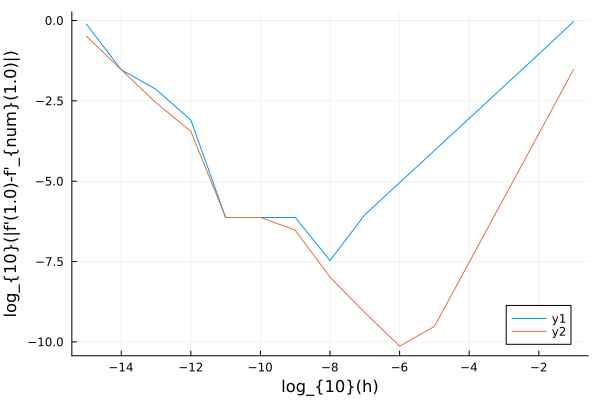

In [16]:
using Plots
plot([ -i for i=1:15 ], log10.(errs_dd) )
plot!([ -i for i=1:15 ], log10.(errs_ds) )
xlabel!("log_{10}(h)")
ylabel!("log_{10}(|f'(1.0)-f'_{num}(1.0)|)")

De la figura se ve que, aproximadamente, el error de la derivada derecha
decae hasta cierto valor de $h$. Esto también se observa en la derivada simétrica,
pero la pendiente del decaimiento del error es 2 para la derivada simétrica,
y sólo 1 para la derecha. Es decir, para la derivada derecha el cálculo
da un error $\cal{O}(h)$ mientras que para la simétrica es $\cal{O}(h^2)$.
Para ambos casos, al reducir más el valor de $h$ (más allá del valor *óptimo*),
¡el error aumenta como $\cal{O}(h)$!.

Los resultados anteriores sobre la convergencia se pueden entender analíticamente
de la siguiente manera: si
usamos el desarrollo en series de Taylor de $f(x_0+h)$ y $f(x_0-h)$ tenemos

$$
\begin{align*}
f(x_0+h) & = f(x_0) + h f^\prime(x_0) + \frac{h^2}{2}f^{\prime\prime}(x_0) + \mathcal{O}(h^3),\\
f(x_0-h) & = f(x_0) - h f^\prime(x_0) + \frac{h^2}{2}f^{\prime\prime}(x_0) + \mathcal{O}(h^3),\\
\end{align*}
$$
de donde obtenemos, para cada aproximación de la derivada,
$$
\begin{align*}
\frac{\Delta f_+}{\Delta x} & = f^\prime(x_0) + \mathcal{O}(h),\\
\frac{\Delta f_\textrm{sym}}{\Delta x} & = f^\prime(x_0) + \mathcal{O}(h^2).\\
\end{align*}
$$

Como mencionamos antes, la derivada derecha tiene un error
de orden $h$ para la derivada, mientras que la aproximación de la derivada simétrica
tiene un error que es proporcional a $h^2$. Esto muestra que en general, la aproximación de
la derivada simétrica puede ser mejor.

El hecho de que el *límite* no pueda ser simulado como uno quisiera no está relacionado
con las propiedades de convergencia (en términos de $h$), sino está relacionado con que
el cálculo *numérico* involucra números de punto flotante (y no números en $\mathbb{R}$),
y que las diferencias de números de punto flotante muy cercanos (como las que definen
los numeradores), o las divisiones con números muy pequeños, conllevan la pérdida de precisión.
Esto se conoce como
[cancelación catastrófica](https://en.wikipedia.org/wiki/Catastrophic_cancellation).

### Derivada de *paso complejo*

Ahora, por divertimento, consideraremos la siguiente definición de la derivada,
que podemos llamar  *derivada de paso complejo*

$$
f^\prime(x_0) \equiv \lim_{h\to 0} \textrm{Im}\left(\frac{f(x_0+i h)}{h}\right),
$$

donde $i^2 = -1$, e $\textrm{Im}(x)$ es la parte imaginaria de $x$, y reharemos los
ejercicios que hemos hecho hasta ahora.

In [17]:
"""
    derivada_pasocomplejo(f, x0,h)

Evalúa la derivada de `f` en `x0` usando la definición basada en una evaluación
compleja.
"""
derivada_pasocomplejo(f, x0, h) = imag( f( complex(x0, h) )/h )

Main.var"##292".derivada_pasocomplejo

In [18]:
errorabs_dc(f, f′, x0, h) = abs(f′(x0) - derivada_pasocomplejo(f, x0, h))

errorabs_dc (generic function with 1 method)

In [19]:
errs_dc = [errorabs_dc(f, f′, 1.0, 1/10^i) for i=1:15]

15-element Vector{Float64}:
 0.02999999999999936
 0.0002999999999993008
 3.0000000013075123e-6
 2.999999892949745e-8
 3.000000248221113e-10
 3.000266701747023e-12
 3.019806626980426e-14
 1.7763568394002505e-15
 0.0
 0.0
 0.0
 1.7763568394002505e-15
 0.0
 0.0
 0.0

In [20]:
findmin(errs_dc)

(0.0, 9)

In [21]:
derivada_pasocomplejo(f, 1.0, 1.0e-9)

9.0

En este caso, observamos que obtenemos el resultado *numéricamente* exacto, incluso
para un valor de $h$ finito.

Repitiendo el análisis que hicimos antes, en este caso tenemos
$$
f(x_0+i h) = f(x_0) + i h f^\prime(x_0) - \frac{h^2}{2}f^{\prime\prime}(x_0) + \mathcal{O}(h^3),
$$
de donde tenemos
$$
\textrm{Im}\left(\frac{f(x_0+i h)}{h}\right) = f^\prime(x_0) + \mathcal{O}(h^2),
$$
de donde vemos que la aproximación tiene un error proporcional a $h^2$. Sin embargo, y
a diferencia de la derivada simétrica, la implementación de la derivada compleja no
incluye cancelaciones catastróficas (en la diferencia), por lo que para valores de $h$
suficientemente pequeños, el error de la aproximación queda escondida en el error
de redondeo.

Para más información sobre estos detalles ver
[esta liga](https://nhigham.com/2020/10/06/what-is-the-complex-step-approximation/)
y/o [este artículo](https://epubs.siam.org/doi/epdf/10.1137/S003614459631241X).

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*